# 1.Modules

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pandasql import sqldf

# 2.Variables

## 2.1. Filenames

In [3]:
# National emissions reported to the Convention on Long-range Transboundary Air Pollution (LRTAP Convention), 2023
# https://sdi.eea.europa.eu/catalogue/srv/eng/catalog.search#/metadata/2999364f-be52-4012-b4fd-f98e2cc8fab6
ds_LRTAPemissions='01.Data/eea_t_lrtap-convention_p_1990-2021_v01_r00/CLRTAP_NVFR19_V23_1_GF_csv.csv'

## 2.2. Analysis parameters

In [50]:
# European 27 Countries
countryEU27 = ['BE','BG','CZ','DK','DE','EE','IE','EL','ES','FR','HR','IT','CY','LV','LT','LU','HU','MT','NL','AT','PL','PT','RO','SI','SK','FI','SE']

# 3.Load data

In [4]:
df_LRTAPemissions=pd.read_csv(ds_LRTAPemissions,header=0,delimiter="\t", dtype='unicode')

# 4. Exploratory data analysis (EDA)

## 4.1. EDA general

### 4.1.1. Data preview (head)

In [5]:
df_LRTAPemissions.head()

,Country_Code,Country,Pollutant_name,Format_name,Sector_code,Year,Emissions,Unit,Notation,VersionId,Parent_sector_code,Sector_name
0,AT,Austria,As,NFR 2014-1,1A1a,1990,NaN,Mg,NaN,1,NATIONAL TOTAL,Public electricity and heat production
1,AT,Austria,As,NFR 2014-1,1A1b,1990,NaN,Mg,NaN,1,NATIONAL TOTAL,Petroleum refining
2,AT,Austria,As,NFR 2014-1,1A1c,1990,NaN,Mg,NaN,1,NATIONAL TOTAL,Manufacture of solid fuels and other energy in...
3,AT,Austria,As,NFR 2014-1,1A2a,1990,NaN,Mg,NaN,1,NATIONAL TOTAL,Stationary combustion in manufacturing industr...
4,AT,Austria,As,NFR 2014-1,1A2b,1990,NaN,Mg,NaN,1,NATIONAL TOTAL,Stationary combustion in manufacturing industr...


### 4.1.2. Data preview (tail)

In [6]:
df_LRTAPemissions.tail()

,Country_Code,Country,Pollutant_name,Format_name,Sector_code,Year,Emissions,Unit,Notation,VersionId,Parent_sector_code,Sector_name
3933691,EEA32,EEA32,PCB,NEC NFR-1 sector classification,5E,2009,80.94100949939022,kg,NaN,NaN,NaN,NaN
3933692,EEA32,EEA32,total PAH,NEC NFR-1 sector classification,5C1bv,2011,0.0009683435030517829,Mg,NaN,NaN,NaN,NaN
3933693,EEA32,EEA32,Zn,NEC NFR-1 sector classification,3B4a,2009,0,Mg,NaN,NaN,NaN,NaN
3933694,EEA32,EEA32,HCB,NEC NFR-1 sector classification,1A2f,2002,1.0821639623803498,kg,NaN,NaN,NaN,NaN
3933695,EEA32,EEA32,Hg,NEC NFR-1 sector classification,2A5a,2010,0.0002,Mg,NaN,NaN,NaN,NaN


### 4.1.3. Shape of dataset

In [7]:
df_LRTAPemissions.shape

(3933696, 12)

### 4.1.4. Data types

In [8]:
df_LRTAPemissions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3933696 entries, 0 to 3933695
Data columns (total 12 columns):
 #   Column              Dtype 
---  ------              ----- 
 0   Country_Code        object
 1   Country             object
 2   Pollutant_name      object
 3   Format_name         object
 4   Sector_code         object
 5   Year                object
 6   Emissions           object
 7   Unit                object
 8   Notation            object
 9   VersionId           object
 10  Parent_sector_code  object
 11  Sector_name         object
dtypes: object(12)
memory usage: 360.1+ MB


### 4.1.5. Data conversions

We can see that the columns `Year` and `Emissions` has `object` data type, let's correct it.

In [9]:
df_LRTAPemissions['Emissions'] = df_LRTAPemissions['Emissions'].astype("float")
df_LRTAPemissions['Year'] = df_LRTAPemissions['Year'].astype("int")

In [10]:
df_LRTAPemissions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3933696 entries, 0 to 3933695
Data columns (total 12 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Country_Code        object 
 1   Country             object 
 2   Pollutant_name      object 
 3   Format_name         object 
 4   Sector_code         object 
 5   Year                int64  
 6   Emissions           float64
 7   Unit                object 
 8   Notation            object 
 9   VersionId           object 
 10  Parent_sector_code  object 
 11  Sector_name         object 
dtypes: float64(1), int64(1), object(10)
memory usage: 360.1+ MB


## 4.2. EDA dimensions

### 4.2.1. Year

In [11]:
# Describe used with lambda functions to prevent exponential notation
df_LRTAPemissions['Year'].describe().apply(lambda x: format(x, 'f'))

count    3933696.000000
mean        2005.500000
std            9.233094
min         1990.000000
25%         1997.750000
50%         2005.500000
75%         2013.250000
max         2021.000000
Name: Year, dtype: object

In [12]:
df_LRTAPemissions.Year.unique()

array([1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021])

In [13]:
df_LRTAPemissions.Year.nunique()

32

### 4.2.2. Country_code

In [14]:
df_LRTAPemissions.Country_Code.unique()

array(['AT', 'BE', 'DK', 'FI', 'FR', 'DE', 'GR', 'IE', 'IT', 'LU', 'NL',
       'PT', 'ES', 'SE', 'BG', 'HR', 'CY', 'CZ', 'EE', 'HU', 'LT', 'LV',
       'MT', 'PL', 'RO', 'SI', 'SK', 'EU27', 'CH', 'IS', 'LI', 'NO', 'TR',
       'EEA32'], dtype=object)

In [15]:
df_LRTAPemissions.Country_Code.nunique()

34

### 4.2.3. Country

In [16]:
df_LRTAPemissions.Country.unique()

array(['Austria', 'Belgium', 'Denmark', 'Finland', 'France', 'Germany',
       'Greece', 'Ireland', 'Italy', 'Luxembourg', 'Netherlands',
       'Portugal', 'Spain', 'Sweden', 'Bulgaria', 'Croatia', 'Cyprus',
       'Czechia', 'Estonia', 'Hungary', 'Lithuania', 'Latvia', 'Malta',
       'Poland', 'Romania', 'Slovenia', 'Slovakia', 'EU27', 'Switzerland',
       'Iceland', 'Liechtenstein', 'Norway', 'Türkiye', 'Czech Republic',
       'EEA32'], dtype=object)

In [17]:
df_LRTAPemissions.Country.nunique()

35

In [18]:
q = """SELECT Country_Code, COUNT(DISTINCT Country) FROM df_LRTAPemissions GROUP BY Country_Code HAVING COUNT(DISTINCT Country)>1;"""
pysqldf = lambda q: sqldf(q, globals())
df_duplicateCC = pysqldf(q)

In [19]:
df_duplicateCC

,Country_Code,COUNT(DISTINCT Country)
0,CZ,2


In [20]:
q = """SELECT DISTINCT Country_Code, Country FROM df_LRTAPemissions WHERE Country_Code='CZ';"""
pysqldf = lambda q: sqldf(q, globals())
df_uniqueCC = pysqldf(q)

In [21]:
df_uniqueCC

,Country_Code,Country
0,CZ,Czechia
1,CZ,Czech Republic


### 4.2.4. Pollutant name

In [22]:
df_LRTAPemissions.Pollutant_name.unique()

array(['As', 'BC', 'benzo(a)', 'benzo(b)', 'benzo(k)', 'Cd', 'CO', 'Cr',
       'Cu', 'dioxin', 'HCB', 'Hg', 'Indeno', 'NH3', 'Ni', 'NMVOC', 'NOx',
       'Pb', 'PCB', 'PM10', 'PM2.5', 'Se', 'SOx', 'total PAH', 'TSP',
       'Zn'], dtype=object)

In [23]:
df_LRTAPemissions.Pollutant_name.nunique()

26

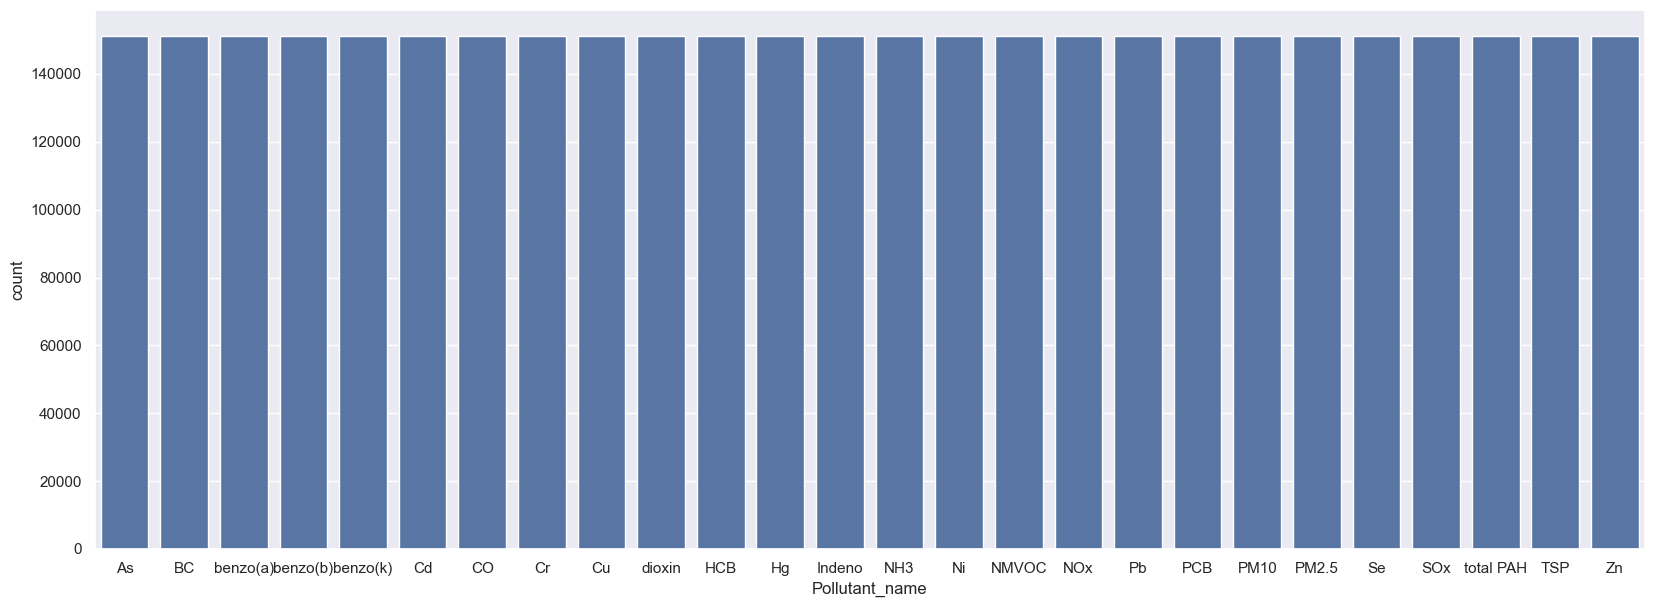

In [24]:
sns.set(rc={'figure.figsize':(20,7)})
sns.countplot(x='Pollutant_name', data=df_LRTAPemissions);

### 4.2.5. Version

In [25]:
df_LRTAPemissions.VersionId.unique()

array(['1', nan], dtype=object)

In [26]:
df_LRTAPemissions.VersionId.nunique()

1

### 4.2.6. Unit

In [27]:
q = """SELECT Pollutant_name, COUNT(DISTINCT Unit) FROM df_LRTAPemissions GROUP BY Pollutant_name HAVING COUNT(DISTINCT Unit)>1;"""
pysqldf = lambda q: sqldf(q, globals())
df_duplicateUNIT = pysqldf(q)

In [28]:
df_duplicateUNIT

,Pollutant_name,COUNT(DISTINCT Unit)


There are not any `Pollutant_name` which is listed with more than one `Unit`.

### 4.2.7. Notation

In [29]:
df_LRTAPemissions.Notation.unique()

array([nan], dtype=object)

In [30]:
df_LRTAPemissions.Notation.nunique()

0

## 4.3. EDA measures

### 4.3.1. Emissions

In [31]:
# Describe used with lambda functions to prevent exponential notation
df_LRTAPemissions['Emissions'].describe().apply(lambda x: format(x, 'f'))

count    2419559.000000
mean           9.293554
std          257.592859
min            0.000000
25%            0.000000
50%            0.000000
75%            0.031999
max        60480.189090
Name: Emissions, dtype: object

# 5. Perimeter of analysis

## 5.1. Sectors of interest

Let's filter only emissions from domestic and international aviation.

In [33]:
# List sectors of interest which include 'aviation' in their name
col=df_LRTAPemissions.Sector_name.unique()
for i in col: 
    if type(i) is str:
        if 'aviation' in i:
            print(i)

International aviation LTO (civil)
Domestic aviation LTO (civil)
International aviation cruise (civil)
Domestic aviation cruise (civil)


In [34]:
# Define the sectors of interest
sectors_of_interest = [
    'International aviation LTO (civil)',
    'Domestic aviation LTO (civil)',
    'International aviation cruise (civil)',
    'Domestic aviation cruise (civil)'
]

# Filter the DataFrame for these sectors
df_emissions = df_LRTAPemissions[df_LRTAPemissions['Sector_name'].isin(sectors_of_interest)]

In [48]:
df_emissions.Sector_name.unique()

array(['International aviation LTO (civil)',
       'Domestic aviation LTO (civil)',
       'International aviation cruise (civil)',
       'Domestic aviation cruise (civil)'], dtype=object)

## 5.2. Country code

In [52]:
# Filter the DataFrame for these sectors
df_emissions = df_emissions[df_emissions['Country_Code'].isin(countryEU27)]

In [54]:
df_emissions.Country_Code.unique()

array(['AT', 'BE', 'DK', 'FI', 'FR', 'DE', 'IE', 'IT', 'LU', 'NL', 'PT',
       'ES', 'SE', 'BG', 'HR', 'CY', 'CZ', 'EE', 'HU', 'LT', 'LV', 'MT',
       'PL', 'RO', 'SI', 'SK'], dtype=object)

# 6. Management of Nan values

## 6.1. Analysis of Nan values

### 6.1.1. Nan values by Country

In [60]:
df_Nan_Country = df_emissions.groupby(['Country_Code']).agg({'Emissions': lambda x: x.isnull().sum()})
df_Nan_Country

,Emissions
Country_Code,
AT,1920
BE,256
BG,2081
CY,2492
CZ,720
DE,128
DK,0
EE,2048
ES,280


In [77]:
df_Nan_Country['Emissions'].sum()

34862

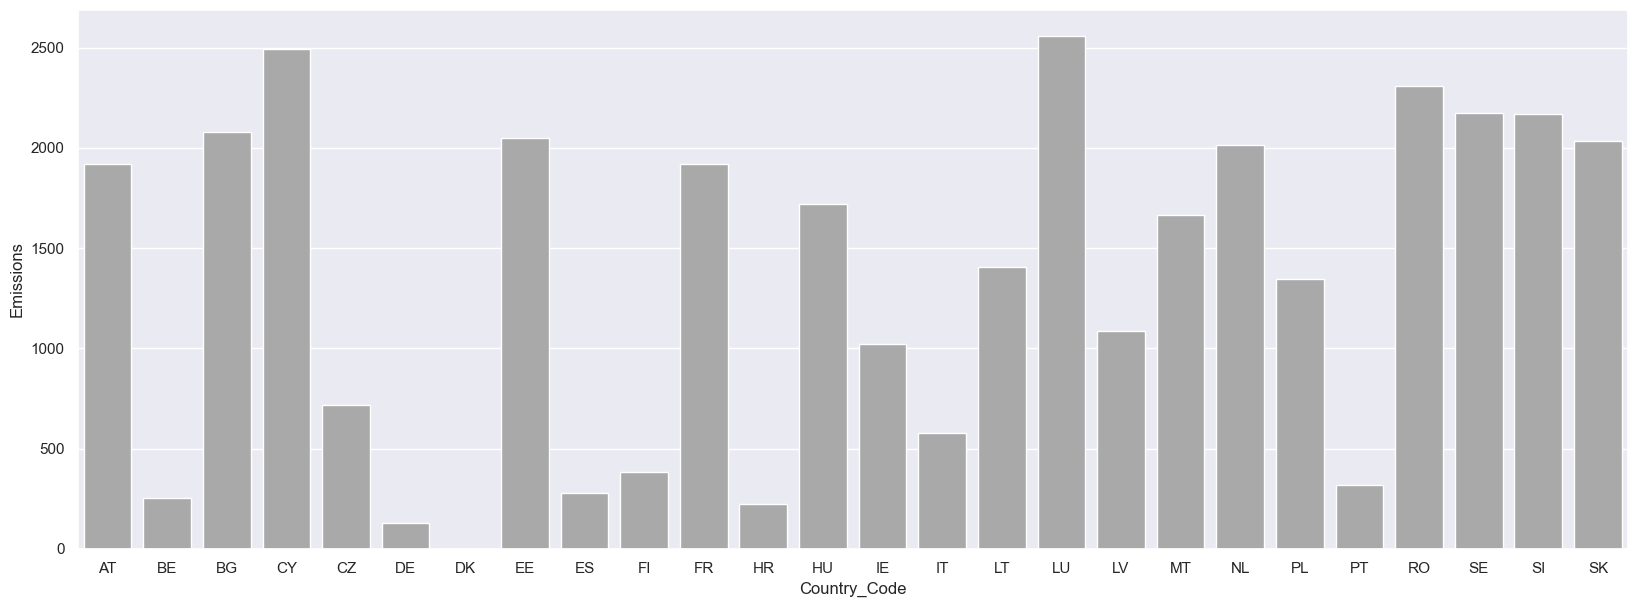

In [71]:
sns.set(rc={'figure.figsize':(20,7)})
sns.barplot(x='Country_Code', y='Emissions', data=df_Nan_Country, color='darkgray');


### 6.1.2. Nan values by Pollutant name

In [73]:
df_Nan_Pollutant = df_emissions.groupby(['Pollutant_name']).agg({'Emissions': lambda x: x.isnull().sum()})
df_Nan_Pollutant

,Emissions
Pollutant_name,
As,1830
BC,804
CO,234
Cd,1574
Cr,1830
Cu,1830
HCB,770
Hg,1670
Indeno,2045


In [78]:
df_Nan_Pollutant['Emissions'].sum()

34862

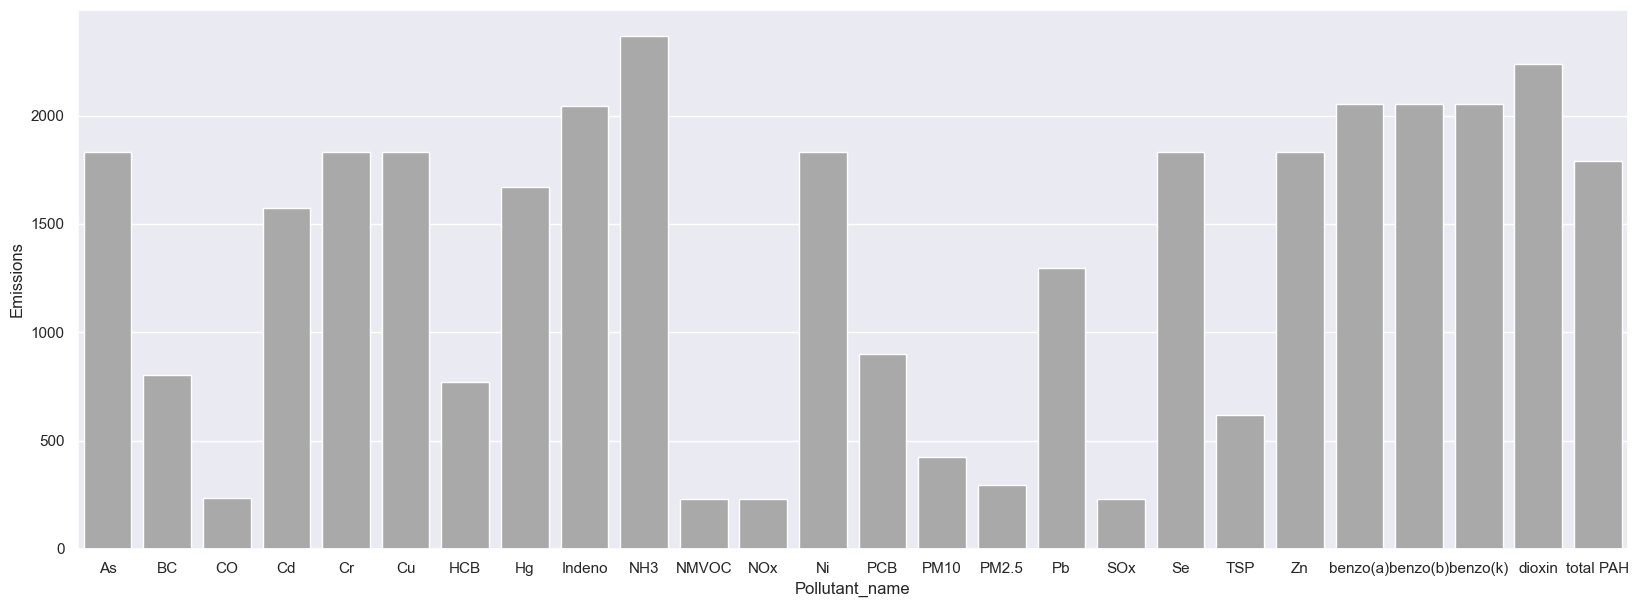

In [74]:
sns.set(rc={'figure.figsize':(20,7)})
sns.barplot(x='Pollutant_name', y='Emissions', data=df_Nan_Pollutant, color='darkgray');

# 7. Aggregation

# 7.1. Numeric aggregation of detailed data

# 7.2. Plotting

# 7.3. Correlation between year and emissions

# 8. Export

# Functions

Using the dataframe file of the previous prompt, please write a function to fill all the null values in the column Emissions using the mean value calculated using the previous 2 years and the next 2 years, with the same Country_Code, Pollutant_name and Sector_name.

In [ ]:
def fill_emissions(df):
    # Define the function to fill NaN values in a group
    def fill_nan(group):
        # Ensure the group is sorted by year
        group = group.sort_values(by='Year')
        # Iterate over the rows
        for i in group[group['Emissions'].isna()].index:
            years = group['Year']
            # Find the index for the current year
            current_year_index = group.index.get_loc(i)
            # Select the surrounding years
            selected_years = years[max(current_year_index - 1, 0):min(current_year_index + 1, len(years))]
            # Calculate the mean of the surrounding years, excluding NaN
            mean_val = group.loc[selected_years, 'Emissions'].mean()
            # Fill the NaN value
            group.at[i, 'Emissions'] = mean_val
        return group

    # Apply the function to each group
    try:
        df = df.groupby(['Country_Code', 'Pollutant_name', 'Sector_name']).apply(fill_nan)
    except:
        None
    return df

# Use the function on your DataFrame
# df = fill_emissions(your_dataframe)

Using the dataframe of the previous prompt, please write a function to have a dataframe with Year in the first column and the sum of yearly value of Emissions on each column. The dataframe should have one column per each Pollutant_name.
Please consider only the following Sector_name
- International aviation LTO (civil)
- Domestic aviation LTO (civil)
- International aviation cruise (civil)
- Domestic aviation cruise (civil)

In [ ]:
def transform_df(df):
    # Define the sectors of interest
    sectors_of_interest = [
        'International aviation LTO (civil)',
        'Domestic aviation LTO (civil)',
        'International aviation cruise (civil)',
        'Domestic aviation cruise (civil)'
    ]

    # Filter the DataFrame for these sectors
    filtered_df = df[df['Sector_name'].isin(sectors_of_interest)]

    # Group by Year and Pollutant_name, then sum the Emissions
    grouped = filtered_df.groupby(['Year', 'Pollutant_name'])['Emissions'].sum()

    # Pivot the table
    pivoted_df = grouped.unstack(level='Pollutant_name')

    # Reset index to make 'Year' a column
    pivoted_df.reset_index(inplace=True)

    return pivoted_df

# Use the function on your DataFrame
# transformed_df = transform_df(your_dataframe)

# Load data

In [ ]:
df_NatEmissions=pd.read_csv(ds_NatEmissions,header=0,delimiter="\t", dtype='unicode')

In [ ]:
df_NatEmissions.head()

Let's filter only emissions from domestic and international aviation.

In [ ]:
col=df_NatEmissions.Sector_name.unique()
for i in col: 
    if type(i) is str:
        if 'aviation' in i:
            print(i)

In [ ]:
df_NatEmissions = df_NatEmissions[
    (df_NatEmissions.Sector_name == 'International aviation LTO (civil)') |
    (df_NatEmissions.Sector_name == 'Domestic aviation LTO (civil)') |
    (df_NatEmissions.Sector_name == 'International aviation cruise (civil)') |
    (df_NatEmissions.Sector_name == 'Domestic aviation cruise (civil)')]
df_NatEmissions.Sector_name.unique()

In [ ]:
df_NatEmissions.shape

In [ ]:
df_NatEmissions.info()

We can see that the column `Emissions` has `object` data type, let's correct it.

In [ ]:
df_NatEmissions['Emissions'] = df_NatEmissions['Emissions'].astype("float")

In [ ]:
df_NatEmissions.info()

In [ ]:
df_NatEmissions.Pollutant_name.unique()

In [ ]:
df_NatEmissions['Country_Code'].nunique()

NOTA:
Qui devo inserire una funzione di pulizia in quanto potrei non avere la serie completa per ogni nazione.


In [ ]:
df_NatEmissions.isna().sum()

In [ ]:
df = fill_emissions(df_NatEmissions)

In [ ]:
df.isna().sum()

In [ ]:
df_NatEmissions.groupby(['Pollutant_name']).agg({'Emissions': lambda x: x.isnull().sum()})

In [ ]:
# Filter
df_NatEmissions_CO = df_NatEmissions[df_NatEmissions.Pollutant_name == 'CO']
df_NatEmissions_CO.head()

In [ ]:
# Select only useful columns
df_NatEmissions_CO=df_NatEmissions_CO[['Country_Code','Pollutant_name','Year','Emissions','Unit','Sector_name']]
df_NatEmissions_CO.head()

In [ ]:
# Show null values per each column
df_NatEmissions_CO.isna().sum()

In [ ]:
# These Country has some missiong values on Emissions column
df_NatEmissions_CO_remove=df_NatEmissions_CO[df_NatEmissions_CO.Emissions.isnull()].Country_Code.unique()

In [ ]:
len(df_NatEmissions_CO_remove)

In [ ]:
df_NatEmissions_CO=df_NatEmissions_CO[~df_NatEmissions_CO.Country_Code.isin(df_NatEmissions_CO_remove)]

In [ ]:
df_NatEmissions_CO.isna().sum()

In [ ]:
df_NatEmissions_CO.head()

In [ ]:
df_NatEmissions_CO.groupby(['Sector_name'])['Sector_name'].count()

In [ ]:
df_NatEmissions_CO.groupby(['Unit'])['Unit'].count()

In [ ]:
df_NatEmissions_CO.groupby(['Sector_name','Year'])['Year'].count()

In [ ]:
df_NatEmissions_CO_YEAR=df_NatEmissions_CO.groupby('Year')['Emissions'].sum()
# Convert pd Series to pd Dataframe (https://stackoverflow.com/a/26098292/1008588)
df_NatEmissions_CO_YEAR=pd.DataFrame({'Year':df_NatEmissions_CO_YEAR.index, 'Emissions':df_NatEmissions_CO_YEAR.values})
df_NatEmissions_CO_YEAR.head()

In [ ]:
df_NatEmissions_CO_YEAR['rolling_emissions'] = df_NatEmissions_CO_YEAR.Emissions.rolling(5).mean()

In [ ]:
df_NatEmissions_CO_YEAR.head()

In [ ]:
fig, ax1 = plt.subplots(figsize=(20,7))
color = 'tab:red'

ax1.set_xlabel('Year')
#ax1.set_ylabel('CO2 Emissions', color=color)
ax1.plot(df_NatEmissions_CO_YEAR['Year'], df_NatEmissions_CO_YEAR['Emissions'],color=color) 
plt.grid()

#ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:blue'
#ax2.set_ylabel('CO2 Emissions moving mean', color=color)
ax1.plot(df_NatEmissions_CO_YEAR['Year'], df_NatEmissions_CO_YEAR['rolling_emissions'],color=color) 
#ax2.tick_params(axis='y', labelcolor=color)


plt.show() 

In [ ]:
df_NatEmissions_CO_remove=df_NatEmissions_CO[df_NatEmissions_CO.Emissions.isnull()].Country_Code.unique()
len(df_NatEmissions_CO_remove)
df_NatEmissions_CO=df_NatEmissions_CO[~df_NatEmissions_CO.Country_Code.isin(df_NatEmissions_CO_remove)]







In [ ]:
transformed_df = transform_df(df_NatEmissions)

In [ ]:
transformed_df.head(10)

In [ ]:
df_NatEmissions1 = df_NatEmissions[df_NatEmissions.Pollutant_name == 'CO']

In [ ]:
#AND
df_NatEmissions2=df_NatEmissions[(df_NatEmissions.Pollutant_name == 'CO') & (df_NatEmissions.Sector_name == 'International aviation LTO (civil)')]
#OR
df_NatEmissions3=df_NatEmissions[(df_NatEmissions.Pollutant_name == 'CO') | (df_NatEmissions.Sector_name == 'International aviation LTO (civil)')]

In [ ]:
#df_NatEmissions3.Pollutant_name.unique()
df_NatEmissions3.Sector_name.unique()

In [ ]:
input_data=pd.read_csv(ds_UNFCCEmissions,header=0, dtype='unicode')

In [ ]:
input_data.head()

In [ ]:
input_data.size